In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

%run ../global_variables.py ./
%run ../global_functions.py ./

%matplotlib notebook

In [2]:
approximate=False
if approximate:
    basins=geopandas.read_file("../datasets/basins/basins_with_approx_climate_zones.shp")
else:
    basins=geopandas.read_file("../datasets/basins/basins_with_climate_zones.shp")
basins.set_index("NAME",inplace=True)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.drop([159,22,23],inplace=True) # Antarctica, Greenland,Seven seas (tiny islands Indian ocean)

# 1. Hierarchical clustering

In [3]:
Nbasins=basins.shape[0]
Ndatasets=1694
data_TWS='GRACE_JPL_mascons'
min_year=2003
max_year=2014

NSE_tab=pd.read_csv("../results/water_budget/NSE_tab_{}_{}_{}basins_{}datasets_{}.csv".format(min_year,
                                                                max_year,Nbasins,Ndatasets,data_TWS),index_col=[0])
NSEc_tab=pd.read_csv("../results/water_budget/NSE_cyclic_tab_{}_{}_{}basins_{}datasets_{}.csv".format(min_year,
                                                                max_year,Nbasins,Ndatasets,data_TWS),index_col=[0])

Compute the cost matrix for all basins and all combinations

In [4]:
Sdiff=np.nanmax(NSE_tab,axis=1).reshape(basins.shape[0],1)-NSE_tab

# replace nans by 100, otherwise nans are summed as zeros
Sdiff=pd.DataFrame(np.where(np.isnan(Sdiff),100,Sdiff),Sdiff.index,Sdiff.columns)

Select all basins with sufficient water budget closure.

In [5]:
my_index=basins.loc[(np.nanmax(NSEc_tab,axis=1)>=0.1)|(np.nanmax(NSE_tab,axis=1)>=0.8)].index

Matrix to perform hierarchical clustering.

In [6]:
X=np.where(Sdiff.loc[my_index]>2,2,Sdiff.loc[my_index].values) # maximum value restricted to 2

Hierarchical clustering based on the Euclidean distance (implicit when linkage is `ward`) and minimizing the variance between clusters (`ward`).

<IPython.core.display.Javascript object>


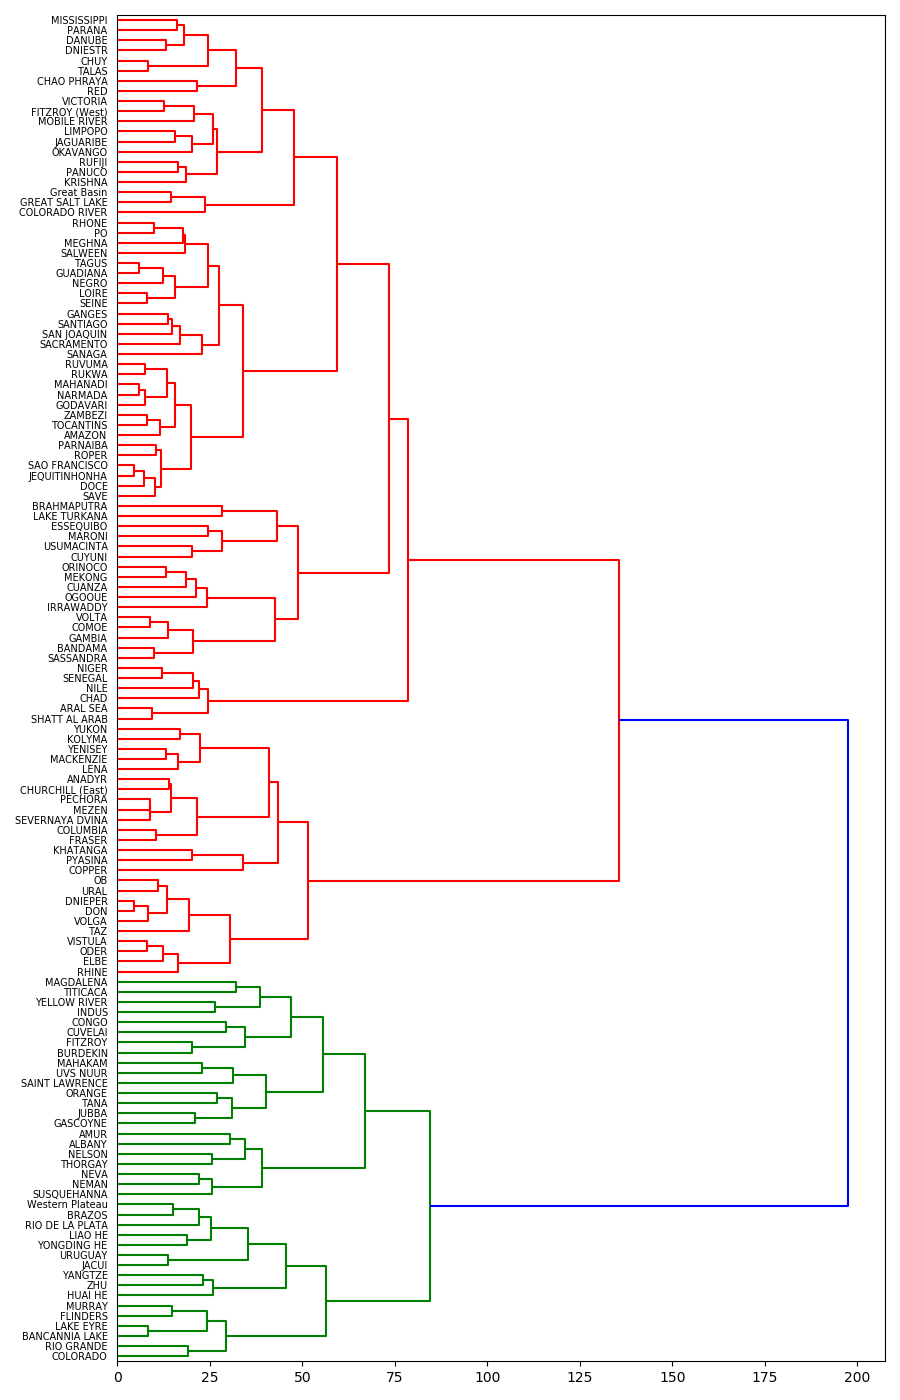

In [7]:
linkage='ward'

plt.figure(figsize=(9,14))
dend = shc.dendrogram(shc.linkage(X, method=linkage),
                      orientation='right',leaf_font_size=7,
                     labels=my_index)
plt.tight_layout()
plt.show()

## 2. Choose the zones based on hierarchical clustering

In [5]:
basins['zone']='other'

basins.loc['LAKE EYRE','zone']='Lake Eyre'
basins.loc['BANCANNIA LAKE','zone']='Lake Eyre'
basins.loc['FLINDERS','zone']='Lake Eyre'
basins.loc['MURRAY','zone']='Lake Eyre'

basins.loc['ZHU','zone']='Yangtze'
basins.loc['YANGTZE','zone']='Yangtze'
#basins.loc['HUAI HE','zone']='Yangtze'

basins.loc['BRAZOS','zone']='Brazos'
basins.loc['Western Plateau','zone']='Brazos'

#basins.loc['NELSON','zone']='Nelson'
#basins.loc['THORGAY','zone']='Nelson'

#basins.loc['ALBANY','zone']='Amur'
#basins.loc['AMUR','zone']='Amur'

#basins.loc['ORANGE','zone']='Orange'
#basins.loc['TANA','zone']='Orange'

basins.loc['CONGO','zone']='Congo'
basins.loc['CUVELAI','zone']='Congo'

#basins.loc['INDUS','zone']='Yellow river'
#basins.loc['YELLOW RIVER','zone']='Yellow river'

basins.loc['RHINE','zone']='Rhine'
basins.loc['ELBE','zone']='Rhine'
basins.loc['ODER','zone']='Rhine'
basins.loc['VISTULA','zone']='Rhine'

basins.loc['VOLGA','zone']='Volga'
basins.loc['DON','zone']='Volga'
basins.loc['DNIEPER','zone']='Volga'

basins.loc['OB','zone']='Volga'
basins.loc['URAL','zone']='Volga'

basins.loc['LENA','zone']='Lena'
basins.loc['KOLYMA','zone']='Lena'
basins.loc['YUKON','zone']='Lena'

basins.loc['MACKENZIE','zone']='Yenisey'
basins.loc['YENISEY','zone']='Yenisey'

basins.loc['CHAD','zone']='Chad'
basins.loc['NILE','zone']='Chad'
basins.loc['SENEGAL','zone']='Chad'
basins.loc['NIGER','zone']='Chad'
basins.loc['ARAL SEA','zone']='Chad'
basins.loc['SHATT AL ARAB','zone']='Chad'

basins.loc['MEKONG','zone']='Orinoco'
basins.loc['ORINOCO','zone']='Orinoco'
basins.loc['CUANZA','zone']='Orinoco'

basins.loc['AMAZON','zone']='Amazon'
basins.loc['TOCANTINS','zone']='Amazon'
basins.loc['ZAMBEZI','zone']='Amazon'
basins.loc['GODAVARI','zone']='Amazon'
basins.loc['NARMADA','zone']='Amazon'
basins.loc['MAHANADI','zone']='Amazon'
basins.loc['RUKWA','zone']='Amazon'
basins.loc['RUVUMA','zone']='Amazon'

basins.loc['GANGES','zone']='Ganges'
basins.loc['SANTIAGO','zone']='Ganges'
basins.loc['SAN JOAQUIN','zone']='Ganges'
basins.loc['SACRAMENTO','zone']='Ganges'
basins.loc['SANAGA','zone']='Ganges'

basins.loc['DANUBE','zone']='Danube'
basins.loc['DNIESTR','zone']='Danube'

basins.loc['PARANA','zone']='Danube'
basins.loc['MISSISSIPPI','zone']='Danube'



if basins.shape[0]!=189:
    print('ATTENTION')

<IPython.core.display.Javascript object>


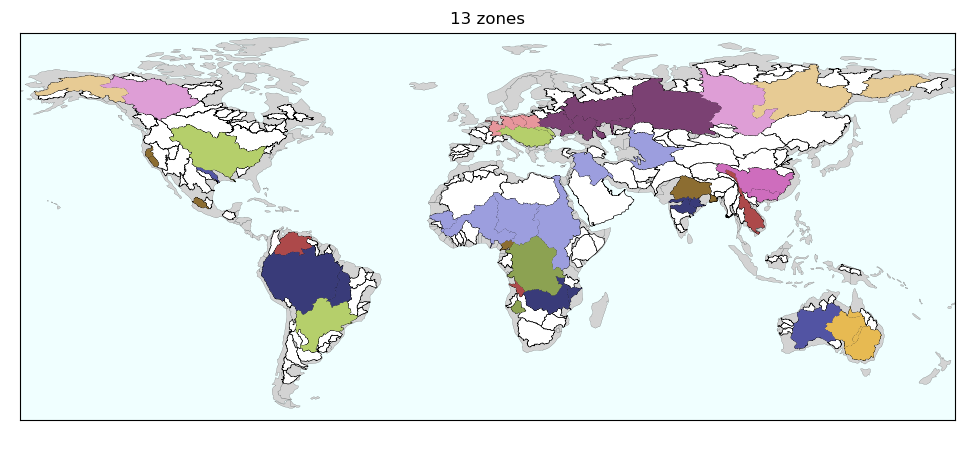

In [10]:
fig, ax = plt.subplots(figsize=(9.7,4.5))
ax.set_aspect('equal')

world.plot(ax=ax,color='lightgrey',edgecolor='black',linewidth=0.1)
basins.plot(ax=ax,facecolor='white',edgecolor='black',linewidth=0.4)
basins.loc[basins['zone']!='other'].plot(ax=ax,column='zone',categorical=True,
                                         cmap='tab20b',#legend=True,
                                         linewidth=0.4)
ax.set_facecolor("azure")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([-170,180])
ax.set_ylim([-60,85])
plt.title('{} zones'.format(np.unique(basins['zone']).shape[0]-1))
fig.tight_layout()
plt.show()

In [6]:
if approximate:
    basins.to_file("../datasets/basins/basins_with_approx_climate_zones.shp")
else:
    basins.to_file("../datasets/basins/basins_with_climate_zones.shp")

# 3. Highlight zones on the dendogram

Associate a color to each leaf if in a zone

In [10]:
df=pd.Series(dend['ivl'],index=np.arange(5,10*X.shape[0],10),name='leaf').to_frame()
for basin_name in df['leaf'].values:
    zone=basins.loc[basin_name,'zone']
    if zone!='other':
        df.loc[df['leaf']==basin_name,'color']=dict_color_zone[zone]
    else:
        df.loc[df['leaf']==basin_name,'color']='k'

<IPython.core.display.Javascript object>


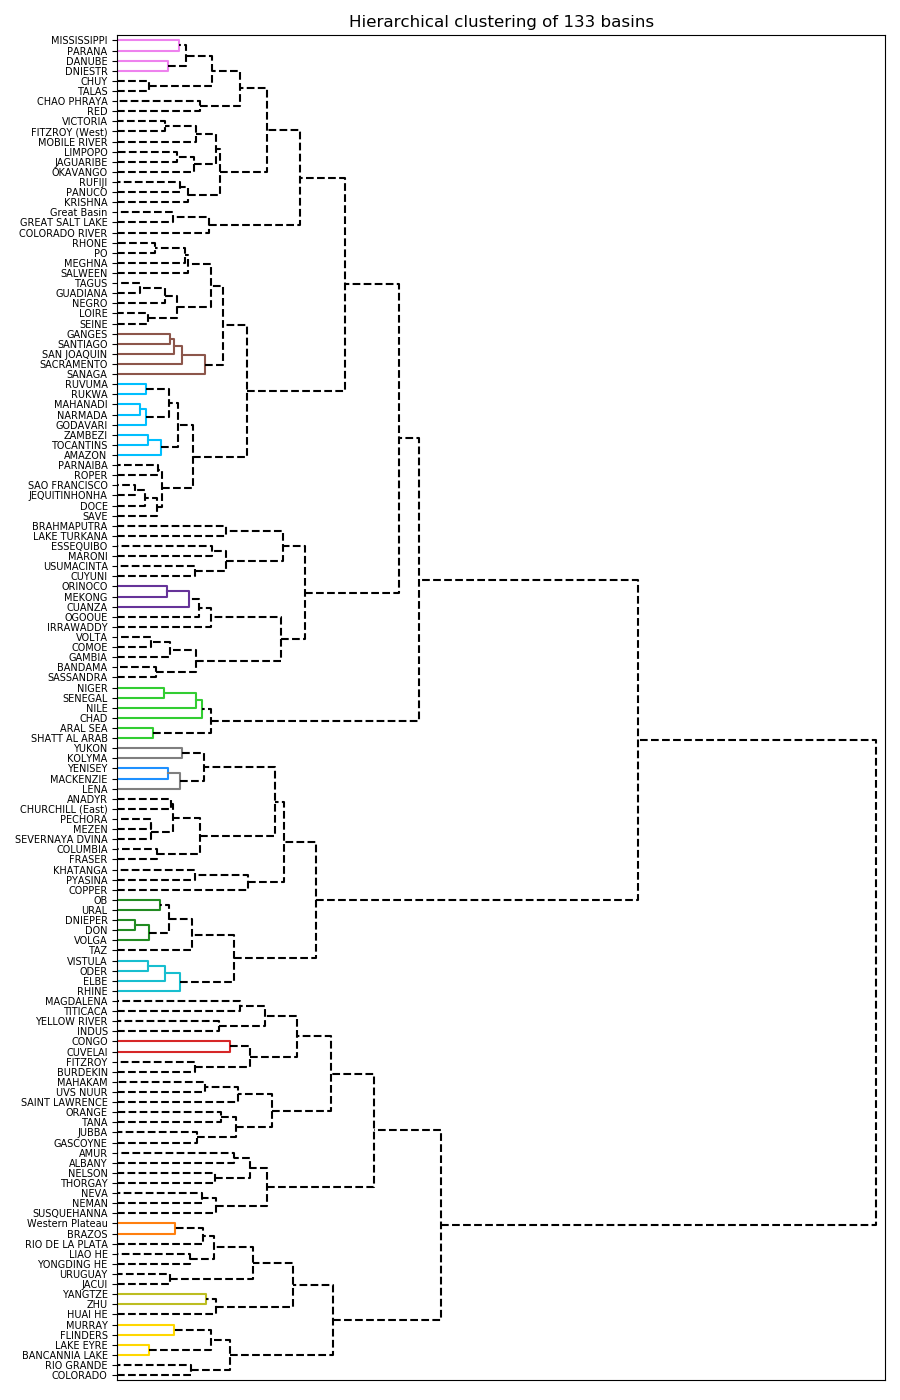

In [12]:
plt.figure(figsize=(9, 14))
plt.title('Hierarchical clustering of {} basins'.format(my_index.shape[0]))
for lx,ly in zip(dend['icoord'],dend['dcoord']):
    if (lx[0]-5)%10==0 and ly[0]==0: # one part of the line is a leaf
        color=df.loc[int(lx[0]),'color']
        if color!='k':
            plt.plot(ly,lx,color=color)
        else:
            plt.plot(ly,lx,'--',color='k')
    else:
        plt.plot(ly,lx,'--',color='k')
plt.yticks(np.arange(5,10*X.shape[0],10),
           np.where(np.asarray(dend['ivl'])=='Great Basin except Great Salt Lake','Great Basin',dend['ivl']),
           fontsize=7)
plt.ylim([0,10*X.shape[0]])
plt.xticks([],[])
plt.xlim([0,200])
plt.tight_layout()
plt.show()

Choose the number of clusters based on the distance

In [13]:
threshold=25
list_x=[]
for i in range(len(dend['icoord'])):
    if np.max(dend['dcoord'][i])>threshold:
        list_x.append(dend['icoord'][i][0])
        list_x.append(dend['icoord'][i][2])
Nclusters=len(list_x)//2+1
print('nb clusters: {}'.format(Nclusters))

nb clusters: 47


In [15]:
Nclusters=3
cluster = AgglomerativeClustering(n_clusters=Nclusters, affinity='euclidean', linkage=linkage)
cluster.fit_predict(X)

cluster_basins=pd.Series(cluster.labels_,index=my_index,name='hierarchical cluster')

# assign a nan to basins alone in their cluster
unique_labels,count_labels=np.unique(cluster.labels_,return_counts=True)
cluster_basins.loc[np.isin(cluster.labels_,unique_labels[np.where(count_labels==1)])]=np.nan

<IPython.core.display.Javascript object>


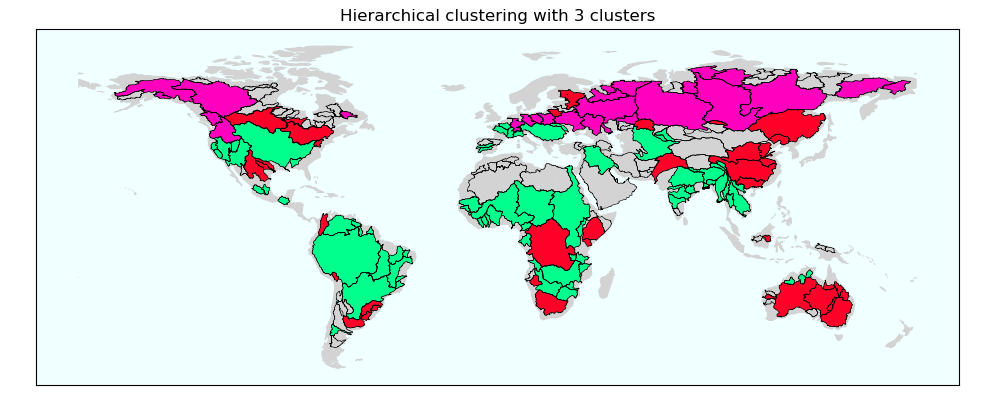

c:\users\fafal\miniconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


In [16]:
basins_plot=basins.loc[my_index].copy()
basins_plot['hierarchical cluster']=cluster_basins

fig, ax = plt.subplots(figsize=(9.9,4))
ax.set_aspect('equal')
world.plot(ax=ax,color='lightgrey',edgecolor='black',linewidth=0.01)
basins.boundary.plot(ax=ax,color='black',linewidth=0.4)
#basins.plot(ax=ax,color='grey',edgecolor='black',linewidth=0.5)
basins_plot.plot(ax=ax,column='hierarchical cluster',edgecolor='grey',linewidth=0.1,
                 cmap=plt.cm.get_cmap('gist_rainbow'),
                 categorical=True,#legend=True,
                 missing_kwds={'color':'grey'},
                )
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('azure')
ax.set_title('Hierarchical clustering with {} clusters'.format(Nclusters))
plt.tight_layout()
plt.show()